# Health Inclusive Poverty Measure (HIPM) 2023

Source: https://www.census.gov/library/working-papers/2024/demo/sehsd-wp2024-24.html

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


| variables      | description                                                                                                        |   |
|----------------|--------------------------------------------------------------------------------------------------------------------|---|
| h_seq          | household number                                                                                                   |   |
| pppos          | person id                                                                                                            |   |
| spm_id         | SPM unit identifier                                                                                                |   |
| hipm_id        | health insurance unit identifier                                                                                   |   |
| hitype         | HIPM insurance type                                                                                                |   |
| expansion      | HIPM poverty status                                                                                                |   |
| subsidy        | indicator for individuals who are imputed a subsidy based on parameters   for advanced preminum tax credits (APTC) |   |
| hipm_poor      | HIPM poverty status                                                                                                |   |
| ind_need       | individual health need based on health insurance type, age, and location   (for second lowest cost silver plan)    |   |
| unit_need      | health insurance unit health need (ind_need aggregated at hipm_level                                               |   |
| hipm_need      | SPM unit health need (ind_need aggregated for all hipm_id in each spm_id)                                          |   |
| aptc           | estimated value of Marketplace subsidy                                                                             |   |
| prem_cap       | capped premium spending based on health insurance type                                                             |   |
| py_res         | part year resources for those with part-year Medicaid                                                              |   |
| hi_resources   | individual health benefits                                                                                         |   |
| moop_cap       | unit level capped non-premium out of pocket spending                                                               |   |
| unit_benefits  | health insurance unit health benefits                                                                              |   |
| hipm_benefits  | SPM unit health benefits                                                                                           |   |
| hipm_resources | SPM threshold combined with hipm_need                                                                              |   |
| marsupwt       | ASEC Supplement Final Weight                                                                                       |   |
| filedate       | date file is released for versioning                                                                               |   |

In [2]:
df = pd.read_csv('../data/HIPM/Health_Inclusive_Poverty_Measure_HIPM_2023.csv').drop('filedate', axis=1)
df

,h_seq,pppos,spm_id,hipm_id,hitype,expansion,subsidy,hipm_poor,ind_need,unit_need,...,aptc2,prem_cap,py_res,hi_resources,moop_cap,unit_benefits,hipm_benefits,hipm_resources,hipm_threshold,marsupwt
0,6,41,6001,60101.0,3,1,1,0,16748,16748,...,0,1979.0,NaN,14769.3980,220,14549,31697,64725,61451,60157
1,6,42,6001,60102.0,3,1,1,0,16748,16748,...,0,2029.0,NaN,14718.9980,900,13819,31697,64725,61451,60157
2,6,43,6001,60303.0,4,1,0,0,3329,3329,...,0,0.0,NaN,3328.6802,0,3329,31697,64725,61451,131204
3,7,41,7001,70101.0,5,1,0,0,8493,8493,...,0,0.0,4247.0,4246.7397,300,3947,8462,55980,34891,155999
4,7,42,7001,70102.0,6,1,0,0,8115,8115,...,0,3600.0,NaN,4514.8799,0,4515,8462,55980,34891,155999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144260,89473,41,89473001,894730101.0,6,1,0,0,6399,6399,...,0,0.0,NaN,6398.7598,100,6299,12609,114737,74319,71541
144261,89473,43,89473001,894730102.0,6,1,0,0,3390,16361,...,0,6000.0,NaN,10360.5610,4050,6311,12609,114737,74319,60053
144262,89473,45,89473001,894730102.0,6,1,0,0,3390,16361,...,0,6000.0,NaN,10360.5610,4050,6311,12609,114737,74319,58197
144263,89473,42,89473001,894730102.0,6,1,0,0,6191,16361,...,0,6000.0,NaN,10360.5610,4050,6311,12609,114737,74319,71541


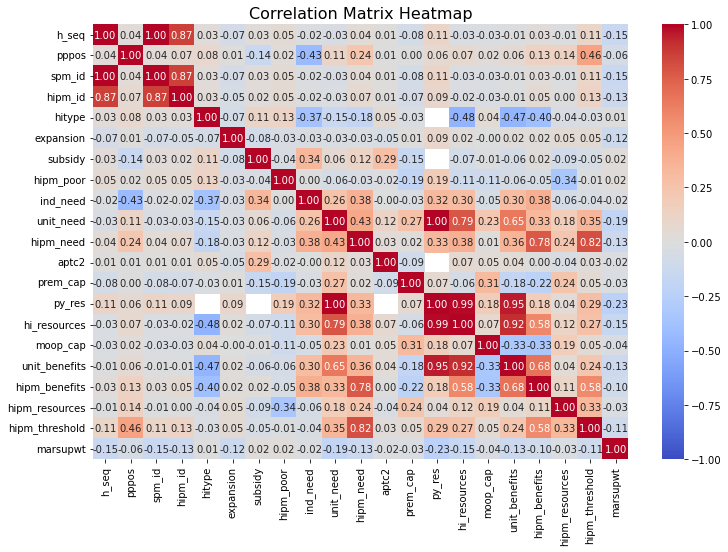

In [3]:
cm = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, cbar=True)
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.show()

In [4]:
drop_cols = ['pppos', 'spm_id', 'py_res', 'hipm_threshold']
df = df.drop(drop_cols, axis=1).drop_duplicates()
df

,h_seq,hipm_id,hitype,expansion,subsidy,hipm_poor,ind_need,unit_need,hipm_need,aptc2,prem_cap,hi_resources,moop_cap,unit_benefits,hipm_benefits,hipm_resources,marsupwt
0,6,60101.0,3,1,1,0,16748,16748,36825,0,1979.0,14769.3980,220,14549,31697,64725,60157
1,6,60102.0,3,1,1,0,16748,16748,36825,0,2029.0,14718.9980,900,13819,31697,64725,60157
2,6,60303.0,4,1,0,0,3329,3329,36825,0,0.0,3328.6802,0,3329,31697,64725,131204
3,7,70101.0,5,1,0,0,8493,8493,16608,0,0.0,4246.7397,300,3947,8462,55980,155999
4,7,70102.0,6,1,0,0,8115,8115,16608,0,3600.0,4514.8799,0,4515,8462,55980,155999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144260,89473,894730101.0,6,1,0,0,6399,6399,22759,0,0.0,6398.7598,100,6299,12609,114737,71541
144261,89473,894730102.0,6,1,0,0,3390,16361,22759,0,6000.0,10360.5610,4050,6311,12609,114737,60053
144262,89473,894730102.0,6,1,0,0,3390,16361,22759,0,6000.0,10360.5610,4050,6311,12609,114737,58197
144263,89473,894730102.0,6,1,0,0,6191,16361,22759,0,6000.0,10360.5610,4050,6311,12609,114737,71541


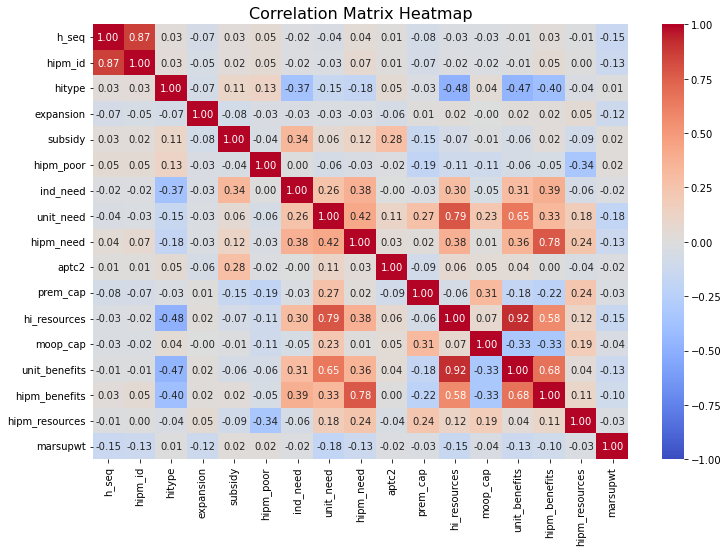

In [5]:
cm = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, cbar=True)
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.show()

In [6]:
unique_values_data = []

for column in df.columns:
    unique_values = df[column].nunique()
    
    unique_values_data.append({'Column': column, 'Unique Values Count': unique_values})
unique_values_df = pd.DataFrame(unique_values_data)

In [7]:
unique_values_df

,Column,Unique Values Count
0,h_seq,56251
1,hipm_id,89889
2,hitype,16
3,expansion,2
4,subsidy,2
5,hipm_poor,2
6,ind_need,5418
7,unit_need,16933
8,hipm_need,21384
9,aptc2,2283


In [8]:
missing_summary = df.isnull().sum()
missing_summary

h_seq               0
hipm_id             0
hitype              0
expansion           0
subsidy             0
hipm_poor           0
ind_need            0
unit_need           0
hipm_need           0
aptc2               0
prem_cap          245
hi_resources        0
moop_cap            0
unit_benefits       0
hipm_benefits       0
hipm_resources      0
marsupwt            0
dtype: int64

In [9]:
df.describe()

,h_seq,hipm_id,hitype,expansion,subsidy,hipm_poor,ind_need,unit_need,hipm_need,aptc2,prem_cap,hi_resources,moop_cap,unit_benefits,hipm_benefits,hipm_resources,marsupwt
count,140691.000000,1.406910e+05,140691.000000,140691.000000,140691.000000,140691.000000,140691.000000,140691.000000,140691.000000,140691.000000,140446.000000,140691.000000,140691.000000,140691.000000,140691.000000,1.406910e+05,1.406910e+05
mean,46095.972074,4.635002e+08,5.912397,0.715739,0.204484,0.144835,7888.531299,14580.545564,22309.422280,296.381282,2036.028281,11148.148745,1860.749486,9287.403061,14491.174013,1.164907e+05,2.306546e+05
std,26191.587812,3.067806e+08,2.939245,0.451063,0.403325,0.351936,5362.638476,7230.298613,11522.028465,2057.270292,3258.344296,7639.030812,3210.459352,8063.954224,12033.821208,9.231910e+04,1.412543e+05
min,6.000000,6.010100e+04,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2476.000000,0.000000,0.000000,0.000000,0.000000,-185392.000000,-180634.000000,-2.496250e+05,9.943000e+03
25%,23006.000000,2.292751e+08,4.000000,0.000000,0.000000,0.000000,3828.000000,8917.000000,14880.000000,0.000000,0.000000,4914.000000,150.000000,3427.000000,6296.500000,6.112500e+04,1.212150e+05
50%,46526.000000,4.645001e+08,6.000000,1.000000,0.000000,0.000000,5668.000000,15718.000000,19904.000000,0.000000,520.000000,11555.000000,670.000000,9418.000000,13422.000000,9.587900e+04,2.200040e+05
75%,69226.000000,6.920802e+08,6.000000,1.000000,0.000000,0.000000,11448.000000,17526.000000,29063.000000,0.000000,2500.000000,15708.998000,2200.000000,14563.500000,21184.000000,1.442290e+05,3.083830e+05
max,89473.000000,8.942810e+09,15.000000,1.000000,1.000000,1.000000,50460.000000,65653.000000,139696.000000,44995.000000,34698.000000,64923.195000,200200.000000,58882.000000,116386.000000,1.534975e+06,2.148861e+06


In [10]:
df.columns

Index(['h_seq', 'hipm_id', 'hitype', 'expansion', 'subsidy', 'hipm_poor',
       'ind_need', 'unit_need', 'hipm_need', 'aptc2', 'prem_cap',
       'hi_resources', 'moop_cap', 'unit_benefits', 'hipm_benefits',
       'hipm_resources', 'marsupwt'],
      dtype='object')

<Figure size 864x576 with 0 Axes>

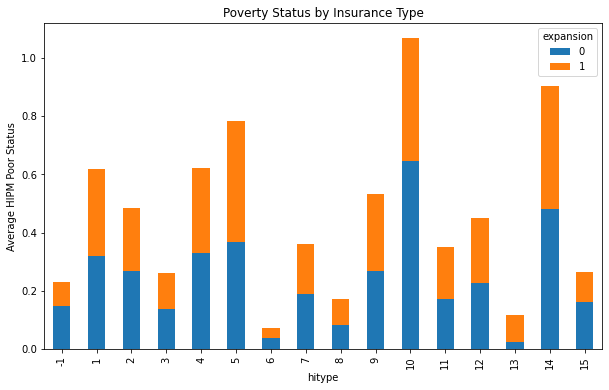

In [11]:
# 1. Poverty Analysis
plt.figure(figsize=(12, 8))
poverty_analysis = df.groupby(['hitype', 'expansion'])['hipm_poor'].mean().unstack()
poverty_analysis.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Poverty Status by Insurance Type")
plt.ylabel("Average HIPM Poor Status")
plt.show()

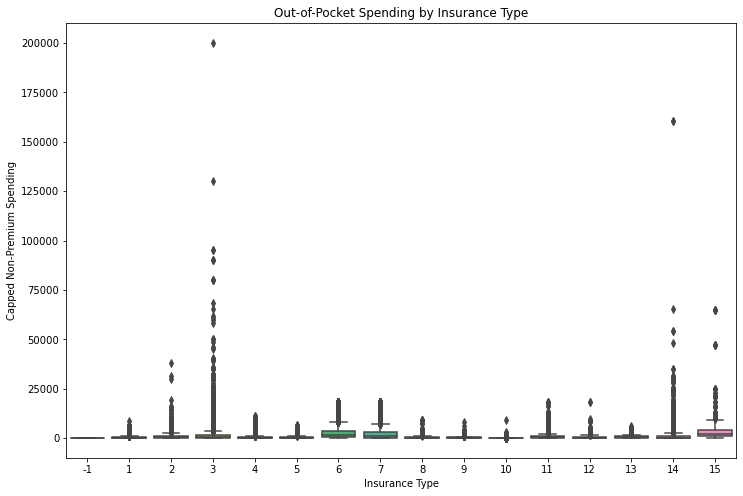

In [12]:
# 2. Out-of-Pocket Spending
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='hitype', y='moop_cap')
plt.title("Out-of-Pocket Spending by Insurance Type")
plt.ylabel("Capped Non-Premium Spending")
plt.xlabel("Insurance Type")
plt.show()

<Figure size 864x576 with 0 Axes>

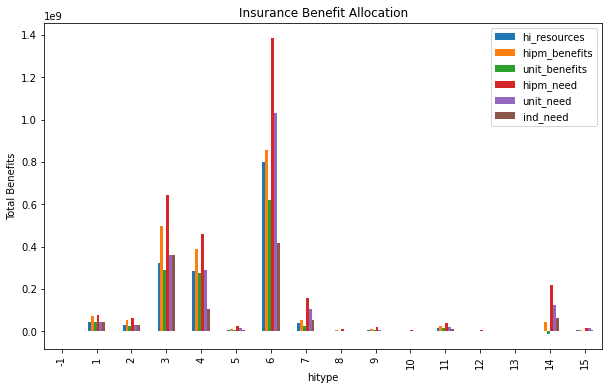

In [13]:
cols=['hi_resources', 'hipm_benefits','unit_benefits', 'hipm_need', 'unit_need', 'ind_need']
# 3. Insurance Benefit Allocation
plt.figure(figsize=(12, 8))
benefit_distribution = df.groupby('hitype')[cols].sum()
benefit_distribution.plot(kind='bar', figsize=(10, 6))
plt.title("Insurance Benefit Allocation")
plt.ylabel("Total Benefits")
plt.show()


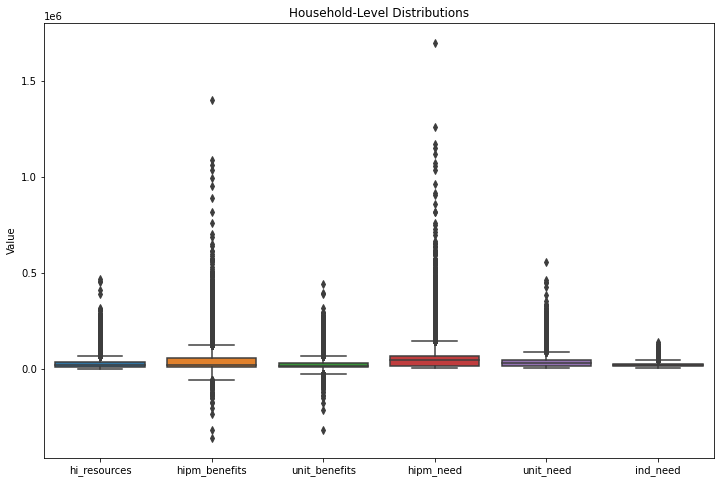

In [14]:
# 4. Household-Level Analysis
plt.figure(figsize=(12, 8))
household_analysis = df.groupby('h_seq')[cols].sum()
sns.boxplot(data=household_analysis)
plt.title("Household-Level Distributions")
plt.ylabel("Value")
plt.show()

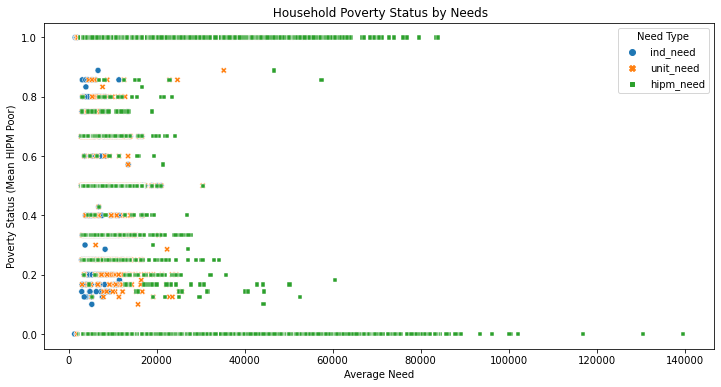

In [16]:
# 5. Group data by household and calculate mean need values and poverty status
household_analysis = df.groupby('h_seq').agg({
    'hipm_poor': 'mean',   # Average poverty status within each household
    'ind_need': 'mean',    # Average individual health need
    'unit_need': 'mean',   # Average health insurance unit need
    'hipm_need': 'mean'    # Average HIPM need
}).reset_index()

# Visualizing Poverty Status by Household Needs
melted_df = household_analysis.melt(
    id_vars='hipm_poor', 
    value_vars=['ind_need', 'unit_need', 'hipm_need'], 
    var_name='Need Type', 
    value_name='Average Need'
)

plt.figure(figsize=(12, 6))
sns.scatterplot(data=melted_df, x='Average Need', y='hipm_poor', hue='Need Type', style='Need Type')
plt.title(" Household Poverty Status by Needs")
plt.xlabel("Average Need")
plt.ylabel("Poverty Status (Mean HIPM Poor)")
plt.legend(title="Need Type")
plt.show()